<a href="https://colab.research.google.com/github/kassiokennedy/Dio/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula do curso dio:
https://web.dio.me/course/frameworks-de-machine-learning-1/learning/f7a8b6ee-9d77-4312-9bf8-752c0db80346?back=/track/formacao-iot-specialist&tab=path&moduleId=undefined

In [21]:
# https://keras.io/guides/transfer_learning/
# https://keras.io/api/applications/
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras

In [22]:
# pesos do treinamento do resnet50 e os pesos do treinamento da imagenet
# O projeto ImageNet é um grande banco de dados visual projetado para uso em pesquisa de software de reconhecimento de objetos visuais

model = ResNet50(weights='imagenet')

In [23]:
# leitura de exemplo
img_path = 'gato.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

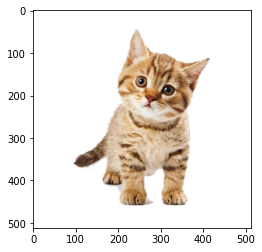

In [24]:
img = mpimg.imread('gato.png')
imgplot =  plt.imshow(img)
plt.show()

In [25]:
# Make a model with 2 layers
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Keep a copy of the weights of layer1 for later reference
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

1/1 [==============================] - 0s 385ms/step - loss: 0.1463
